In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 1. Загрузите данные из файла abalone.csv. 
Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [45]:
data = pd.read_csv('abalone.csv')

# 2. Преобразуйте признак Sex в числовой. 
Значение F должно перейти в -1, I — в 0, M — в 1.

In [46]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [47]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [48]:
X = data.loc[:, :'ShellWeight']
y = data['Rings']

# 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). 
Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  



In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

vec = []
for n in range(1, 51):
    regr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    komp = cross_val_score(regr, X, y, cv=kf, scoring="r2").mean()
    vec.append(komp)

# 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [93]:
for n, score in enumerate(vec):
    if score > 0.52:
        i_max = n + 2 # вообще ответ 21, но курсера его почему-то не принимает
        break
        
f = open('answer.txt', 'w')
f.write(str(i_max))
f.close()

# 6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?



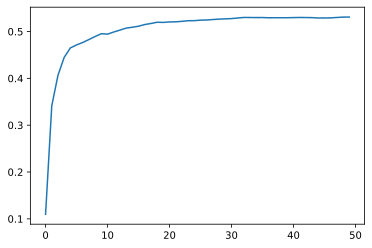

In [72]:
x = np.arange(0.0, 50.0)
plt.plot(x, vec)